In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.metrics import f1_score
from sklearn.neural_network import MLPClassifier

In [3]:
def get_data(type="train"):
    data = []
    label = []
    for i in range(37, 47):
        X = []
        y = []
        target = f"{i:02d}"  
        train_data_path = f"../../data/q2.7/{type}/{target}"
        
        for img_name in os.listdir(train_data_path):
            img_path = os.path.join(train_data_path, img_name)
            
            
            img = cv2.imread(img_path)
            
            
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            
            
            img = cv2.resize(img, (32, 32))
            img = img / 255.0 
            img_flatten = img.flatten()
            X.append(img_flatten)
            y.append(i)

        data.extend(X)
        label.extend(y)

    data = np.array(data)
    label = np.array(label)
    return data, label

X_train , y_train = get_data("train")
X_test , y_test = get_data("test")
y_train = y_train - 37
y_test = y_test - 37
# y_train  = np.eye(10)[y_train ].astype(np.float32)
# y_test  = np.eye(10)[y_test ].astype(np.float32)

Fully trained model 

In [ ]:
y_train

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [ ]:
hidden_layer_length = [512,256,128,64]
classes = np.unique(y_train)
train_F1 = []
test_F1  =[]
model = MLPClassifier(hidden_layer_sizes=hidden_layer_length,activation='relu',solver='sgd', alpha=0 , batch_size = 32,learning_rate='constant')
res = []
for i in range(3):
    model.partial_fit(X_train , y_train ,  classes = classes)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test) +37
    res.extend(y_test_pred)
    train_F1.append(f1_score(y_train , y_train_pred , average='macro'))
    test_F1.append(f1_score(y_test , y_test_pred , average='macro'))
    print(f"epoch {i+1} : Train F1 Score = {train_F1[-1]:.4f} , Test F1 Score = {test_F1[-1]:.4f}")


plt.plot(range(1,21), train_F1 , label = "Train F1 Score Original")
plt.plot(range(1,21), test_F1 , label = "Test F1 Score")
plt.xlabel("Epochs")
plt.ylabel("F1 Score")
plt.show()   

   

C:\Users\dhruv\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:697: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


epoch 1 : Train F1 Score = 0.6089 , Test F1 Score = 0.0000


In [5]:
classes = np.unique(y_train)
model = MLPClassifier(hidden_layer_sizes=[512,256,128,64],activation='relu',solver='sgd', alpha=0 , batch_size = 32,learning_rate='constant')
model.partial_fit(X_train , y_train ,  classes = classes)


MLPClassifier(alpha=0, batch_size=32, hidden_layer_sizes=[512, 256, 128, 64],
              solver='sgd')

In [6]:
model.coefs_

[array([[ 0.03480904,  0.02185829,  0.02259661, ...,  0.00049291,
         -0.01685136, -0.02246175],
        [ 0.00032737,  0.02309522,  0.02087928, ..., -0.0392428 ,
         -0.00091726, -0.0263765 ],
        [ 0.01379865, -0.00036781, -0.02363491, ...,  0.01383347,
         -0.00187356,  0.03619665],
        ...,
        [ 0.02158831,  0.00525597, -0.00268685, ..., -0.02404572,
          0.00649264,  0.00564012],
        [-0.01454322,  0.02035658,  0.00255786, ..., -0.00285775,
          0.03046444,  0.01775947],
        [-0.01315652,  0.00877334,  0.01669918, ..., -0.03921988,
         -0.00801515,  0.03601177]]),
 array([[ 7.79141703e-02, -1.31223543e-02, -3.15468695e-02, ...,
          3.89940328e-02,  2.43499982e-02,  2.95394552e-02],
        [ 4.12491503e-03, -8.09715331e-02,  4.99079581e-02, ...,
         -8.74277468e-02, -1.56548325e-02,  3.54223602e-02],
        [ 3.11515282e-02, -7.73756414e-02,  5.21345618e-02, ...,
         -6.27348558e-02, -2.57143493e-02,  2.98963597e-

In [13]:
res 
# df = pd.DataFrame(res, columns=['result'])
# df.to_csv("prediction_f.csv", index=False)


[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 9,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 7,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 9,
 0,
 9,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 9,
 0,
 7,
 0,
 0,
 0,
 9,
 1,
 9,
 0,
 0,
 0,
 0,
 0,
 9,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 7,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 7,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [8]:
import pickle
with open(os.path.join("../outputs", 'mlp_weights.pkl'), 'rb') as f:
    params = pickle.load(f)

weights = params['weights']
biases = params['biases']


hidden_layer_length = [512,256,128,64]
classes = np.unique(y_train)
new_train_F1 = []
new_test_F1  = []
new_model = MLPClassifier(hidden_layer_sizes=hidden_layer_length,activation='relu',solver='sgd', alpha=0 , batch_size = 32,learning_rate='constant')
new_model.partial_fit(X_train[:1] , y_train[:1],classes = np.arange(10))
new_model.coefs_[:-1] = weights
new_model.intercepts_[:-1] = biases





for i in range(20):
    new_model.partial_fit(X_train , y_train , classes = np.arange(10))
    y_train_pred = new_model.predict(X_train)
    y_test_pred = new_model.predict(X_test)
    new_train_F1.append(f1_score(y_train , y_train_pred , average='macro'))
    new_test_F1.append(f1_score(y_test , y_test_pred , average='macro'))
    print(f"epoch {i+1} : Train F1 Score = {new_train_F1[-1]:.4f} , Test F1 Score = {new_test_F1[-1]:.4f}")






C:\Users\dhruv\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:608: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(


epoch 1 : Train F1 Score = 0.9492 , Test F1 Score = 0.9289
epoch 2 : Train F1 Score = 0.9722 , Test F1 Score = 0.9547
epoch 3 : Train F1 Score = 0.9837 , Test F1 Score = 0.9624
epoch 4 : Train F1 Score = 0.9896 , Test F1 Score = 0.9650
epoch 5 : Train F1 Score = 0.9945 , Test F1 Score = 0.9654
epoch 6 : Train F1 Score = 0.9983 , Test F1 Score = 0.9690
epoch 7 : Train F1 Score = 0.9988 , Test F1 Score = 0.9690
epoch 8 : Train F1 Score = 0.9995 , Test F1 Score = 0.9723
epoch 9 : Train F1 Score = 1.0000 , Test F1 Score = 0.9736
epoch 10 : Train F1 Score = 1.0000 , Test F1 Score = 0.9730
epoch 11 : Train F1 Score = 1.0000 , Test F1 Score = 0.9737
epoch 12 : Train F1 Score = 1.0000 , Test F1 Score = 0.9730
epoch 13 : Train F1 Score = 1.0000 , Test F1 Score = 0.9730
epoch 14 : Train F1 Score = 1.0000 , Test F1 Score = 0.9733
epoch 15 : Train F1 Score = 1.0000 , Test F1 Score = 0.9743
epoch 16 : Train F1 Score = 1.0000 , Test F1 Score = 0.9740
epoch 17 : Train F1 Score = 1.0000 , Test F1 Scor

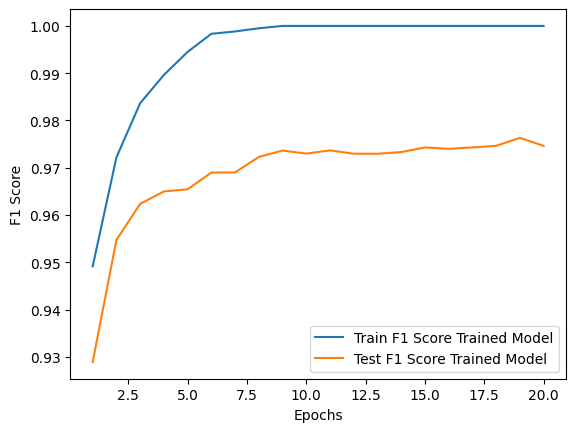

In [9]:


plt.plot(range(1,21), new_train_F1 , label = "Train F1 Score Trained Model")
plt.plot(range(1,21), new_test_F1 , label = "Test F1 Score Trained Model")
plt.xlabel("Epochs")
plt.ylabel("F1 Score")
plt.legend()
plt.show()   

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)


Epoch 1:
Train F1 (macro): 0.9469
Test  F1 (macro): 0.9317

Per-class F1 scores (Train):
  Class 1: 0.9841
  Class 2: 0.9149
  Class 3: 0.9041
  Class 4: 0.9091
  Class 5: 0.9725
  Class 6: 0.9532
  Class 7: 0.9352
  Class 8: 0.9413
  Class 9: 0.9892
  Class 10: 0.9651

Per-class F1 scores (Test):
  Class 1: 0.9693
  Class 2: 0.9281
  Class 3: 0.8679
  Class 4: 0.8939
  Class 5: 0.9508
  Class 6: 0.9381
  Class 7: 0.9159
  Class 8: 0.9461
  Class 9: 0.9730
  Class 10: 0.9338
------------------------------------------------------------

Epoch 2:
Train F1 (macro): 0.9721
Test  F1 (macro): 0.9518

Per-class F1 scores (Train):
  Class 1: 0.9992
  Class 2: 0.9908
  Class 3: 0.8998
  Class 4: 0.9254
  Class 5: 0.9779
  Class 6: 0.9857
  Class 7: 0.9899
  Class 8: 0.9717
  Class 9: 0.9934
  Class 10: 0.9875

Per-class F1 scores (Test):
  Class 1: 0.9850
  Class 2: 0.9814
  Class 3: 0.8554
  Class 4: 0.8984
  Class 5: 0.9744
  Class 6: 0.9748
  Class 7: 0.9481
  Class 8: 0.9489
  Class 9: 0.9

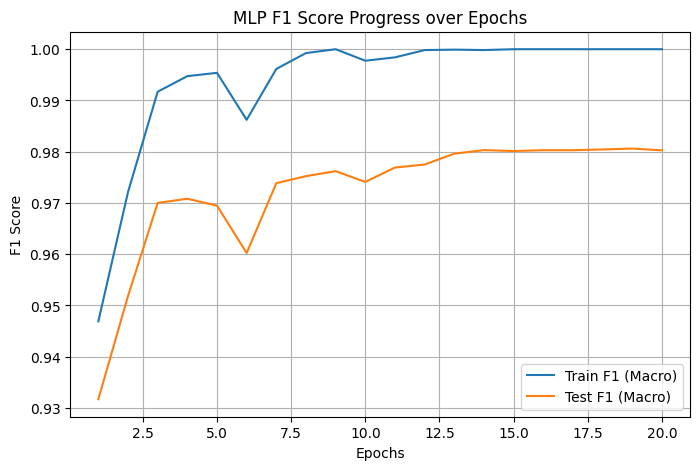

In [3]:
from sklearn.metrics import f1_score
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import numpy as np

hidden_layer_length = [512, 256, 128, 64]
classes = np.unique(y_train)

train_F1 = []
test_F1 = []

# Initialize model
model = MLPClassifier(
    hidden_layer_sizes=hidden_layer_length,
    activation='relu',
    solver='sgd',
    alpha=0,
    batch_size=32,
    learning_rate='constant',
    learning_rate_init=0.01,
    random_state=42,
    max_iter=1  # we’ll call partial_fit manually
)

for epoch in range(20):
    # Online training step
    model.partial_fit(X_train, y_train, classes=np.arange(10))

    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Macro F1 (average)
    f1_train_macro = f1_score(y_train, y_train_pred, average='macro', zero_division=0)
    f1_test_macro = f1_score(y_test, y_test_pred, average='macro', zero_division=0)

    # Per-class F1
    f1_train_per_class = f1_score(y_train, y_train_pred, average=None, zero_division=0)
    f1_test_per_class = f1_score(y_test, y_test_pred, average=None, zero_division=0)

    train_F1.append(f1_train_macro)
    test_F1.append(f1_test_macro)

    # Print summary
    print(f"\nEpoch {epoch+1}:")
    print(f"Train F1 (macro): {f1_train_macro:.4f}")
    print(f"Test  F1 (macro): {f1_test_macro:.4f}")

    # Display per-class F1 for better analysis
    print("\nPer-class F1 scores (Train):")
    for i, score in enumerate(f1_train_per_class):
        print(f"  Class {i+1}: {score:.4f}")

    print("\nPer-class F1 scores (Test):")
    for i, score in enumerate(f1_test_per_class):
        print(f"  Class {i+1}: {score:.4f}")

    print("------------------------------------------------------------")

# Plot macro F1 trends
plt.figure(figsize=(8, 5))
plt.plot(range(1, 21), train_F1, label="Train F1 (Macro)")
plt.plot(range(1, 21), test_F1, label="Test F1 (Macro)")
plt.xlabel("Epochs")
plt.ylabel("F1 Score")
plt.title("MLP F1 Score Progress over Epochs")
plt.legend()
plt.grid(True)
plt.show()


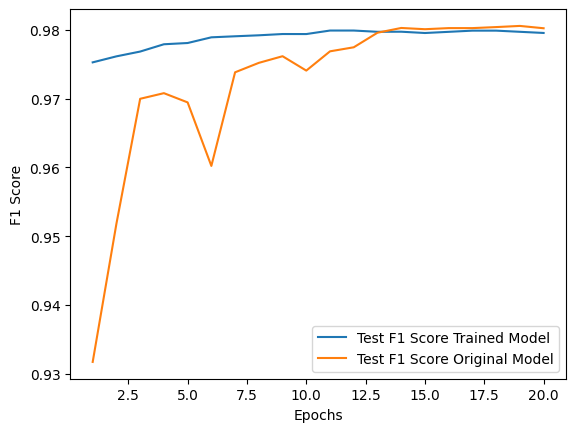

In [10]:
plt.plot(range(1,21), new_test_F1 , label = "Test F1 Score Trained Model")
plt.plot(range(1,21) , test_F1  , label = "Test F1 Score Original Model") 
plt.xlabel("Epochs")
plt.ylabel("F1 Score")
plt.legend()
plt.show()